<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
C:\Users\DELL\AppData\Local\Temp\ipykernel_10124\394037473.py:42: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('D:\projects\ml_sales_prj\data\Rossmann Stores Data.csv')


Libraries imported successfully!
TensorFlow version: 2.20.0

DATASET OVERVIEW
Dataset shape: (1017209, 9)

First few rows:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      101720

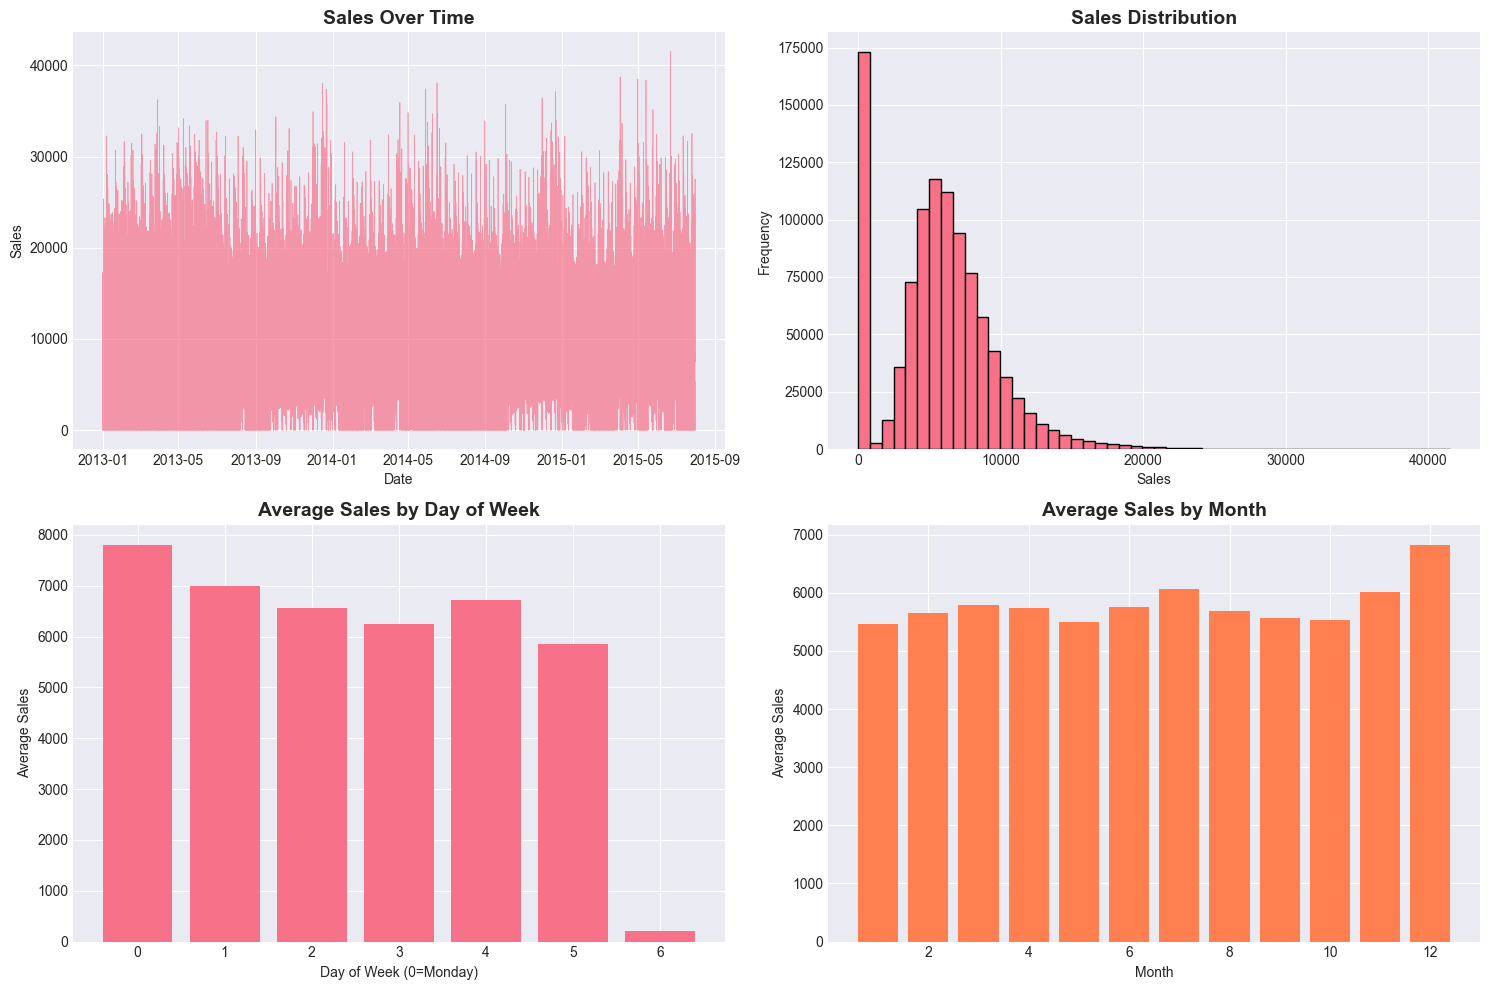


PREPARING DATA FOR LSTM
Data shape after filtering closed stores: (844392, 8)
Data normalized using MinMaxScaler
Scaled data shape: (844392, 7)

Sequence creation complete:
X shape: (844362, 30, 7) (samples, timesteps, features)
y shape: (844362,) (samples,)

Train-Test Split:
Training set: 675489 samples
Test set: 168873 samples

BUILDING LSTM MODEL


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 100)        │        43,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,101 (605.86 KB)

 Trainable params: 155,101 (605.86 KB)

 Non-trainable params: 0 (0.00 B)

None

TRAINING THE MODEL
Epoch 1/100
16888/16888 ━━━━━━━━━━━━━━━━━━━━ 1026s 60ms/step - loss: 0.0044 - mae: 0.0477 - val_loss: 0.0046 - val_mae: 0.0507 - learning_rate: 0.0010
Epoch 2/100
16888/16888 ━━━━━━━━━━━━━━━━━━━━ 1032s 61ms/step - loss: 0.0043 - mae: 0.0471 - val_loss: 0.0046 - val_mae: 0.0499 - learning_rate: 0.0010
Epoch 3/100
16888/16888 ━━━━━━━━━━━━━━━━━━━━ 1084s 64ms/step - loss: 0.0043 - mae: 0.0469 - val_loss: 0.0046 - val_mae: 0.0498 - learning_rate: 0.0010
Epoch 4/100
16888/16888 ━━━━━━━━━━━━━━━━━━━━ 1419s 83ms/step - loss: 0.0042 - mae: 0.0467 - val_loss: 0.0045 - val_mae: 0.0493 - learning_rate: 0.0010
Epoch 5/100
16888/16888 ━━━━━━━━━━━━━━━━━━━━ 1232s 73ms/step - loss: 0.0041 - mae: 0.0463 - val_loss: 0.0045 - val_mae: 0.0490 - learning_rate: 0.0010
Epoch 6/100
16888/16888 ━━━━━━━━━━━━━━━━━━━━ 1285s 76ms/step - loss: 0.0040 - mae: 0.0455 - val_loss: 0.0044 - val_mae: 0.0486 - learning_rate: 0.0010
Epoch 7/100
16888/16888 ━━━━━━━━━━━━━━━━━━━━ 2382s 141ms/step - loss:

In [ ]:
# Rossmann Store Sales Forecasting with LSTM
# Time Series Analysis and Deep Learning Approach

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# TensorFlow/Keras for LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau 
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

# =====================================================
# 1. DATA LOADING AND EXPLORATION
# =====================================================

# Load the dataset
# Note: Update the path to your CSV file
df = pd.read_csv('D:\projects\ml_sales_prj\data\Rossmann Stores Data.csv')

print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nDataset info:")
print(df.info())
print(f"\nBasic statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# =====================================================
# 2. DATA PREPROCESSING
# =====================================================

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Handle missing values
df = df.fillna(0)

# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Display processed data
print(f"Processed data shape: {df.shape}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nNew features added:")
print(df[['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear']].head())

# =====================================================
# 3. EXPLORATORY DATA ANALYSIS
# =====================================================

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Sales distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sales over time
axes[0, 0].plot(df['Date'], df['Sales'], alpha=0.7, linewidth=0.5)
axes[0, 0].set_title('Sales Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Sales')

# Sales distribution
axes[0, 1].hist(df['Sales'], bins=50, edgecolor='black')
axes[0, 1].set_title('Sales Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Sales')
axes[0, 1].set_ylabel('Frequency')

# Average sales by day of week
daily_sales = df.groupby('DayOfWeek')['Sales'].mean()
axes[1, 0].bar(daily_sales.index, daily_sales.values)
axes[1, 0].set_title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Day of Week (0=Monday)')
axes[1, 0].set_ylabel('Average Sales')

# Average sales by month
monthly_sales = df.groupby('Month')['Sales'].mean()
axes[1, 1].bar(monthly_sales.index, monthly_sales.values, color='coral')
axes[1, 1].set_title('Average Sales by Month', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()

# =====================================================
# 4. PREPARE DATA FOR LSTM
# =====================================================

print("\n" + "="*50)
print("PREPARING DATA FOR LSTM")
print("="*50)

# Select features for modeling
# You can adjust these based on your dataset columns
feature_columns = ['Sales', 'Customers', 'Open', 'Promo', 
                   'DayOfWeek', 'Month', 'Year']

# Filter only necessary columns
df_model = df[feature_columns + ['Date']].copy()

# Handle stores that are closed (Sales = 0)
df_model = df_model[df_model['Open'] == 1].copy()

print(f"Data shape after filtering closed stores: {df_model.shape}")

# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_model[feature_columns])

print(f"Data normalized using MinMaxScaler")
print(f"Scaled data shape: {scaled_data.shape}")

# Create sequences for LSTM
def create_sequences(data, target_col_idx, sequence_length):
    """
    Create sequences for LSTM training
    
    Parameters:
    - data: scaled numpy array
    - target_col_idx: index of target column (Sales)
    - sequence_length: number of time steps to look back
    
    Returns:
    - X: input sequences
    - y: target values
    """
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i, target_col_idx])
    
    return np.array(X), np.array(y)

# Set sequence length (look back 30 days)
SEQUENCE_LENGTH = 30
target_col_idx = 0  # Sales is at index 0

X, y = create_sequences(scaled_data, target_col_idx, SEQUENCE_LENGTH)

print(f"\nSequence creation complete:")
print(f"X shape: {X.shape} (samples, timesteps, features)")
print(f"y shape: {y.shape} (samples,)")

# Split into train and test sets (80-20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nTrain-Test Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# =====================================================
# 5. BUILD LSTM MODEL
# =====================================================

print("\n" + "="*50)
print("BUILDING LSTM MODEL")
print("="*50)

# Model architecture
model = Sequential([
    # First LSTM layer with return sequences
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    
    # Second LSTM layer
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    
    # Third LSTM layer
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    
    # Dense layers
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Model summary
print(model.summary())

# =====================================================
# 6. TRAIN THE MODEL
# =====================================================

print("\n" + "="*50)
print("TRAINING THE MODEL")
print("="*50)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,  
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-7,
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Increased epochs to ensure at least 30 epochs of training
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# =====================================================
# 7. EVALUATE THE MODEL
# =====================================================

print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Inverse transform predictions to original scale
# Create dummy arrays for inverse transform
dummy = np.zeros((len(y_pred_test), scaled_data.shape[1]))
dummy[:, 0] = y_pred_test.flatten()
y_pred_test_original = scaler.inverse_transform(dummy)[:, 0]

dummy = np.zeros((len(y_test), scaled_data.shape[1]))
dummy[:, 0] = y_test
y_test_original = scaler.inverse_transform(dummy)[:, 0]

dummy = np.zeros((len(y_pred_train), scaled_data.shape[1]))
dummy[:, 0] = y_pred_train.flatten()
y_pred_train_original = scaler.inverse_transform(dummy)[:, 0]

dummy = np.zeros((len(y_train), scaled_data.shape[1]))
dummy[:, 0] = y_train
y_train_original = scaler.inverse_transform(dummy)[:, 0]

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train_original, y_pred_train_original))
test_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))
train_mae = mean_absolute_error(y_train_original, y_pred_train_original)
test_mae = mean_absolute_error(y_test_original, y_pred_test_original)
train_r2 = r2_score(y_train_original, y_pred_train_original)
test_r2 = r2_score(y_test_original, y_pred_test_original)

print(f"Training Metrics:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  R² Score: {train_r2:.4f}")

print(f"\nTest Metrics:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R² Score: {test_r2:.4f}")

# =====================================================
# 8. VISUALIZE RESULTS
# =====================================================

print("\n" + "="*50)
print("VISUALIZING RESULTS")
print("="*50)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_title('Model MAE Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Plot predictions vs actual
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Test set predictions
axes[0].plot(y_test_original, label='Actual Sales', alpha=0.7)
axes[0].plot(y_pred_test_original, label='Predicted Sales', alpha=0.7)
axes[0].set_title('Test Set: Actual vs Predicted Sales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Sales')
axes[0].legend()
axes[0].grid(True)

# Scatter plot
axes[1].scatter(y_test_original, y_pred_test_original, alpha=0.5)
axes[1].plot([y_test_original.min(), y_test_original.max()], 
             [y_test_original.min(), y_test_original.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_title('Predicted vs Actual Sales (Test Set)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Actual Sales')
axes[1].set_ylabel('Predicted Sales')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# =====================================================
# 9. FUTURE PREDICTIONS (OPTIONAL)
# =====================================================

print("\n" + "="*50)
print("FUTURE FORECASTING")
print("="*50)

# Use the last sequence to predict the next few days
last_sequence = X_test[-1:]
future_predictions = []
n_future = 30  # Predict next 30 days

for _ in range(n_future):
    # Predict next value
    next_pred = model.predict(last_sequence, verbose=0)
    future_predictions.append(next_pred[0, 0])
    
    # Update sequence: remove first timestep, add prediction
    new_row = last_sequence[0, -1, :].copy()
    new_row[0] = next_pred[0, 0]
    last_sequence = np.append(last_sequence[0, 1:, :], [new_row], axis=0)
    last_sequence = last_sequence.reshape(1, SEQUENCE_LENGTH, X_train.shape[2])

# Inverse transform future predictions
dummy = np.zeros((len(future_predictions), scaled_data.shape[1]))
dummy[:, 0] = future_predictions
future_predictions_original = scaler.inverse_transform(dummy)[:, 0]

print(f"Generated {n_future} day forecast")
print(f"Predicted sales for next {n_future} days:")
print(future_predictions_original)

# Plot future predictions
plt.figure(figsize=(15, 6))
historical_days = 100
plt.plot(range(historical_days), y_test_original[-historical_days:], 
         label='Historical Sales', linewidth=2)
plt.plot(range(historical_days, historical_days + n_future), 
         future_predictions_original, 
         label='Future Forecast', linewidth=2, linestyle='--')
plt.axvline(x=historical_days, color='r', linestyle=':', 
            label='Forecast Start', linewidth=2)
plt.title('Sales Forecast for Next 30 Days', fontsize=14, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =====================================================
# 10. MODEL SUMMARY
# =====================================================

print("\n" + "="*50)
print("FINAL MODEL SUMMARY")
print("="*50)
print(f"Model Architecture: Stacked LSTM with 3 layers")
print(f"Sequence Length: {SEQUENCE_LENGTH} days")
print(f"Features Used: {len(feature_columns)}")
print(f"Training Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")
print(f"\nPerformance Metrics (Test Set):")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R² Score: {test_r2:.4f}")
print("\nModel training complete!")

# =====================================================
# OPTIONAL: SAVE THE MODEL
# =====================================================

# Uncomment to save the model
model.save('rossmann_lstm_model.h5')
print("\nModel saved as 'rossmann_lstm_model.h5'")

# To load the model later:
from tensorflow.keras.models import load_model
loaded_model = load_model('rossmann_lstm_model.h5')

In [3]:
import sys
print(sys.executable)

d:\projects\ml_sales_prj\tf_env\Scripts\python.exe
